In [43]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# f_nano = "root://redirector.t2.ucsd.edu//store/user/hmei/nanoaod_runII/HHggtautau/ttHJetToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8_RunIIFall17MiniAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1_MINIAODSIM_v0.6_20201021/test_nanoaod_1.root"


In [ ]:
# fname = "/eos/cms/store/group/phys_higgs/cmshgg/tutorials/HiggsDNA_FinalFits_2024/HiggsDNA_part/01_intro/ggh_M-125_preEE/5d677ef6-111a-428f-a78c-7ae0f68fd140.root"


In [2]:
fname = '61717C81-6C14-AC48-99FD-3611421B22F6.root'

In [3]:
with uproot.open(fname, timeout=120) as f2:
    print(f2.keys())
    tree_2 = f2["Events"]  # can access TTrees by name
    events_2 = tree_2.arrays(entry_stop = 1000, library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [80]:
with uproot.open(fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    Tree_2 = Hfile["Runs"]  # can access TTrees by name
    Events = Tree.arrays(entry_stop = 476000, library="ak", how="zip")
    Runs = Tree_2.arrays(entry_stop = 476000, library="ak", how="zip")
    # tree_2 = f2["sig_tree"] # can access TTrees by name
    # events_2 = tree_2.arrays(library = "ak", how = "zip")
    # events_2 = tree_2.arrays(library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [37]:
Runs.fields

['run',
 'genEventCount',
 'genEventSumw',
 'genEventSumw2',
 'nLHEScaleSumw',
 'nLHEPdfSumw',
 'jagged0',
 'jagged1']

In [40]:
Runs['genEventCount']

<Array [24000] type='1 * int64'>

In [78]:
Events.fields[:100]

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'btagWeight_CSVV2',
 'btagWeight_DeepCSVB',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nSubGenJetAK8',
 'Generator_binvar',
 'Generator_scalePDF',
 'Generator_weight',
 'Generator_x1',
 'Generator_x2',
 'Generator_xpdf1',
 'Generator_xpdf2',
 'Generator_id1'

In [81]:
genparts = Events.GenPart
is_higgs = (abs(genparts.pdgId) == 25)

higgs = genparts[is_higgs]

higgs_pt = ak.flatten(higgs.pt)
higgs_eta = ak.flatten(higgs.eta)
higgs_phi = ak.flatten(higgs.phi)

In [77]:
higgs.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags']

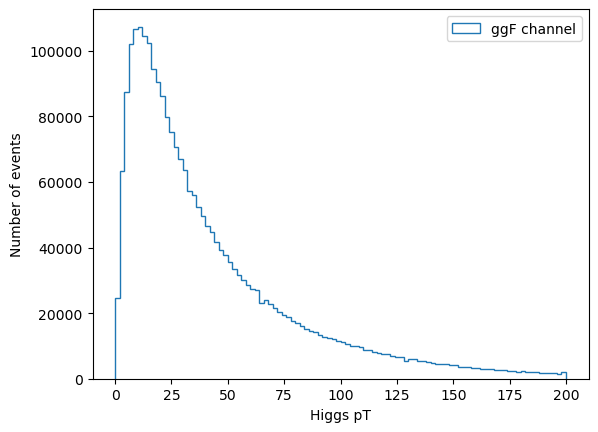

In [82]:
plt.hist(higgs_pt, bins=100, range = (0,200),histtype='step', label = 'ggF channel');
plt.xlabel('Higgs pT');
plt.ylabel('Number of events');
plt.legend()

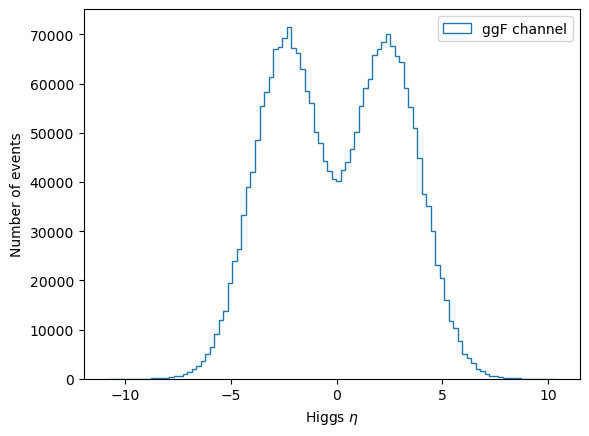

In [83]:
plt.hist(higgs_eta, bins=100,histtype='step', label = 'ggF channel');
plt.xlabel(r'Higgs $\eta$');
plt.ylabel('Number of events');
plt.legend()

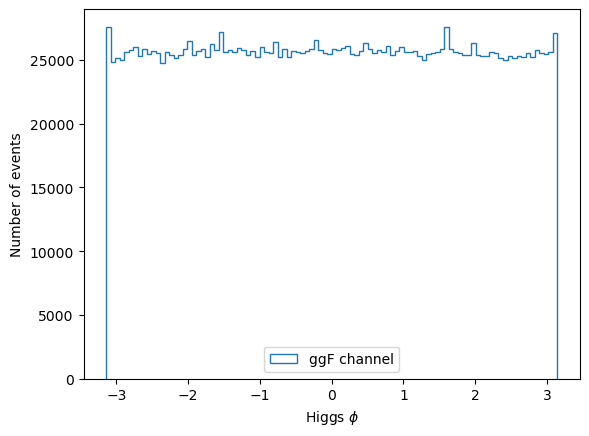

In [84]:
plt.hist(higgs_phi, bins=100,histtype='step', label = 'ggF channel');
plt.xlabel(r'Higgs $\phi$');
plt.ylabel('Number of events');
plt.legend()

In [14]:
jets = Events['Jet']

In [38]:
jets.btagDeepFlavB

<Array [[0.0332, 0.0209], ... 0.0574, 0.0226]] type='24000 * var * float32'>

In [40]:
jets.hadronFlavour
has_nonzero_flavour = ak.any(jets.hadronFlavour != 0)

print("Any non-zero hadronFlavour in jets?", has_nonzero_flavour)

Any non-zero hadronFlavour in jets? True


In [44]:
# Count number of jets with b/c/light flavor
print("b-jets:", ak.sum(jets.hadronFlavour == 5))
print("c-jets:", ak.sum(jets.hadronFlavour == 4))
print("light/unmatched:", ak.sum(jets.hadronFlavour == 0))

# Or see the unique values
# print("Unique hadronFlavour values:", ak.to_list(ak.unique(ak.flatten(jets.hadronFlavour))))
# Flatten first, then use numpy's unique
unique_flavours = np.unique(ak.to_numpy(ak.flatten(jets.hadronFlavour)))
print("Unique hadronFlavour values:", unique_flavours)
# 

b-jets: 789
c-jets: 2672
light/unmatched: 105569
Unique hadronFlavour values: [0 4 5]


In [48]:
btag_cut = 0.6502
bjets = jets[jets.btagDeepFlavB > btag_cut]

In [46]:
len(bjets)

24000

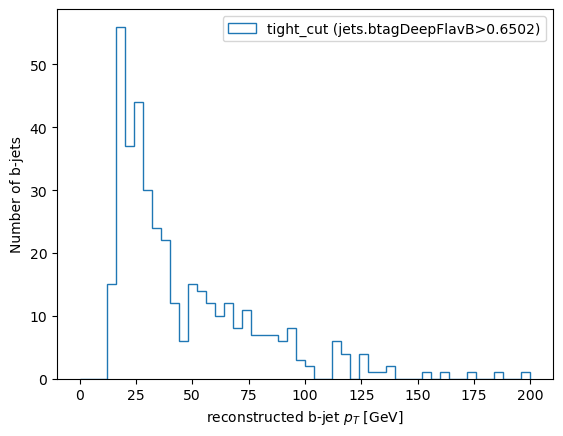

In [59]:
plt.hist(ak.flatten(bjets['pt']), bins=50, range = (0,200),histtype='step', label = 'tight_cut (jets.btagDeepFlavB>0.6502)');
plt.xlabel('reconstructed b-jet $p_T$ [GeV]')
plt.ylabel('Number of b-jets')
plt.legend()

In [51]:
bjets_Gen = jets[jets.hadronFlavour == 5]

Text(0, 0.5, 'Number of b-jets')

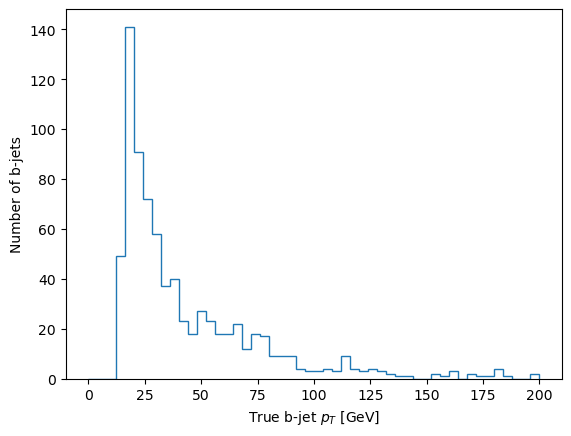

In [58]:
plt.hist(ak.flatten(bjets_Gen['pt']), bins=50, range = (0,200),histtype='step');
plt.xlabel('True b-jet $p_T$ [GeV]')
plt.ylabel('Number of b-jets')

In [53]:
bjets_Gen

<Array [[], [], [], [], ... [], [], [], []] type='24000 * var * {"area": float32...'>

In [22]:
ak.flatten(bjets)

<Array [{area: 0.539, ... cleanmask: 1}] type='71137 * {"area": float32, "btagCS...'>

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 9.0920e+03, 2.1498e+04,
        9.8960e+03, 5.5120e+03, 3.7280e+03, 2.7290e+03, 2.2090e+03,
        1.8610e+03, 1.6570e+03, 1.4450e+03, 1.3430e+03, 1.2910e+03,
        1.1310e+03, 1.0700e+03, 9.8400e+02, 8.8800e+02, 7.4500e+02,
        6.0300e+02, 4.7500e+02, 3.7300e+02, 3.1700e+02, 2.5900e+02,
        2.2600e+02, 1.6900e+02, 1.7400e+02, 1.2800e+02, 1.2600e+02,
        1.0600e+02, 8.5000e+01, 8.6000e+01, 8.1000e+01, 7.2000e+01,
        5.3000e+01, 4.2000e+01, 4.5000e+01, 4.8000e+01, 3.8000e+01,
        4.8000e+01, 4.0000e+01, 3.4000e+01, 2.7000e+01, 2.3000e+01,
        2.8000e+01, 2.1000e+01, 1.6000e+01, 1.7000e+01, 1.4000e+01]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 18

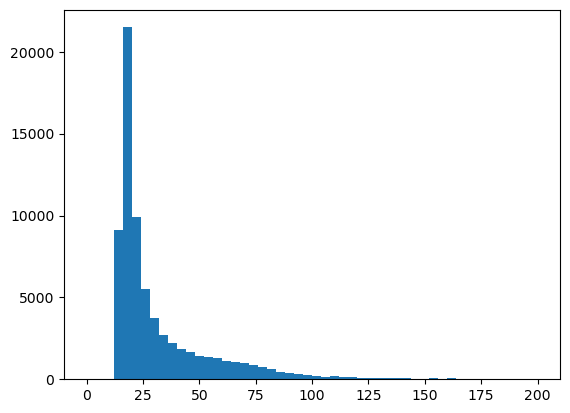

In [24]:
plt.hist(ak.to_numpy(ak.flatten(bjets.pt)), bins=50, range = (0, 200))


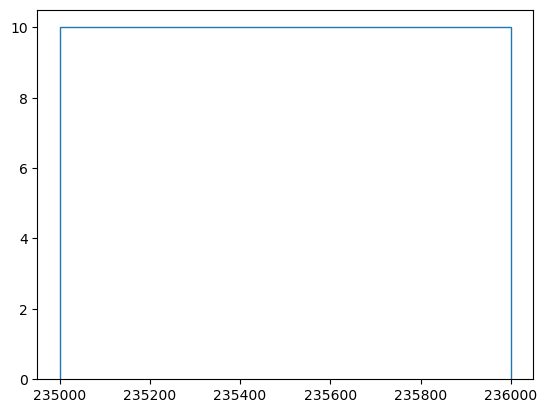

In [10]:
plt.hist(Events['event'], bins=100, histtype='step', label='Events');

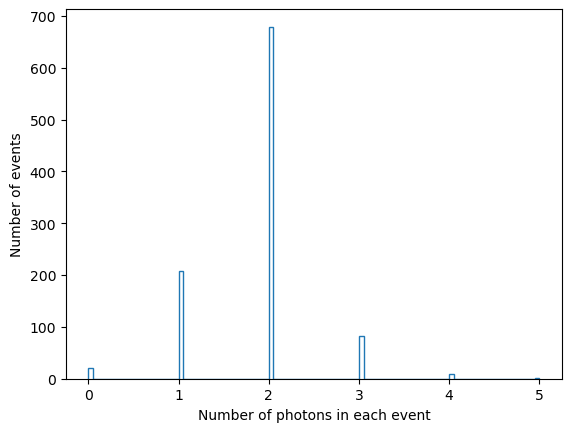

In [7]:
plt.hist(Events['nPhoton'], bins=100, histtype='step', label='Events');
plt.xlabel('Number of photons in each event');
plt.ylabel('Number of events');

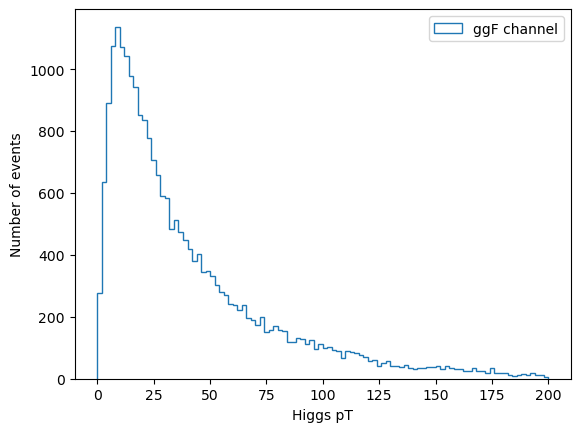

In [12]:
plt.hist(Events['HTXS_Higgs_pt'], range= (0,200),bins=100, histtype='step', label='ggF channel');
plt.xlabel('Higgs pT');
plt.ylabel('Number of events');
plt.legend()

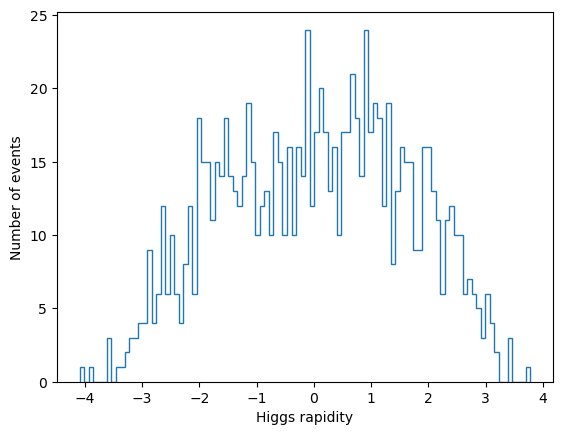

In [80]:
plt.hist(Events['HTXS_Higgs_y'], bins=100, histtype='step', label='Events');
plt.xlabel('Higgs rapidity');
plt.ylabel('Number of events');

In [34]:
# plt.hist(Events['Photon'], bins=100, histtype='step', label='Events');

In [18]:
Events['HLT_Photon500']

<Array [False, False, False, ... False, False] type='1000 * bool'>

In [50]:
Events['Photon'][2]

<Array [{dEscaleDown: 0, ... cleanmask: 1}] type='4 * {"dEscaleDown": float32, "...'>

In [54]:
photon_pts = Events["Photon"]["pt"]
# leading_photon_pt = photon_pts[:, 0]  # Be careful: this will error if some events have no photons


In [57]:
ak.num(photon_pts) 

<Array [0, 1, 4, 2, 3, 3, ... 4, 2, 2, 3, 3, 1] type='1000 * int64'>

In [71]:
# Sort photon pts in descending order within each event
sorted_pts = ak.sort(photon_pts, axis=-1, ascending=False)
sorted_pts# Now extract leading and subleading photon pts
leading_pts = ak.firsts(sorted_pts[ak.num(sorted_pts) >= 2])
sublead_pts = sorted_pts[ak.num(sorted_pts) >= 2][:, 1]




In [77]:
leading_pts

<Array [46.9, 45.8, 30.6, ... 175, 50.9, 41.9] type='719 * ?float32'>

In [78]:
sublead_pts

<Array [44, 14.1, 16.7, ... 16.4, 36, 40.4] type='719 * float32'>

In [74]:
photon_pts[4]

<Array [30.6, 16.7, 12.7] type='3 * float32'>

In [72]:
sorted_pts

<Array [[], [38.8], ... 40.4, 20.9], [83.2]] type='1000 * var * float32'>

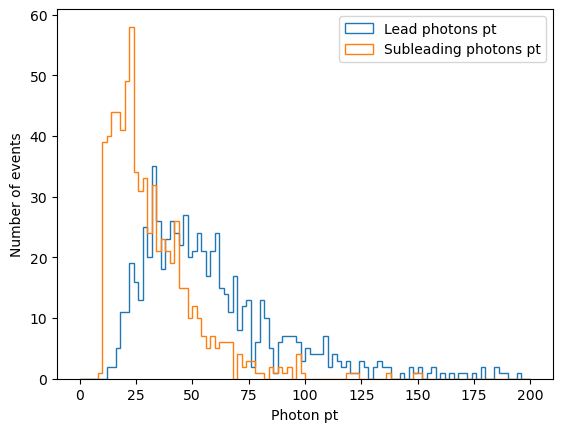

In [79]:
plt.hist(leading_pts, bins=100, range= (0,200),histtype='step', label='Lead photons pt');
plt.hist(sublead_pts, bins=100, range= (0,200),histtype='step', label='Subleading photons pt');
plt.xlabel('Photon pt');
plt.ylabel('Number of events');
plt.legend();

In [ ]:
# mask = ak.num(Photonpta) >= 2
# Photonpta[mask]  # array of photon pts for only such events

In [52]:
photon_pts

<Array [[], [38.8], ... 40.4, 20.9], [83.2]] type='1000 * var * float32'>

In [27]:
Events['HLT_DoublePhoton60']

<Array [False, False, False, ... False, False] type='1000 * bool'>

In [8]:
print(Events['run'][:10])
print(Events['luminosityBlock'][:10])
print(Events['event'][:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[236, 236, 236, 236, 236, 236, 236, 236, 236, 236]
[235003, 235008, 235006, 235004, 235009, 235001, 235007, 235011, 235005, 235010]


In [12]:
events_2.fields

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'HTXS_njets25',
 'HTXS_njets30',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'BeamSpot_type',
 'BeamSpot_sigmaZ',
 'BeamSpot_sigmaZError',
 'BeamSpot_z',
 'BeamSpot_zError',
 'nboostedTau',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nGenProton',
 'nSubGenJetAK8',
 'Generator_id1',
 'Generator_id2',
 'Generator_binvar',
 'Generator_

In [13]:
# Higgs_data = "Higgs_data.root"
with uproot.open(Higgs_data, timeout=120) as f:
    print(f.keys())

['sig_tree;1', 'bkg_tree;1']


In [31]:
with uproot.open(Higgs_data, timeout=120) as f:
    tree = f["sig_tree"] # can access TTrees by name
    events = tree.arrays(library = "ak", how = "zip")
    events = tree.arrays(library="ak", how="zip")

In [36]:
tree.keys()

['Type',
 'lepton_pT',
 'lepton_eta',
 'lepton_phi',
 'missing_energy_magnitude',
 'missing_energy_phi',
 'jet1_pt',
 'jet1_eta',
 'jet1_phi',
 'jet1_b-tag',
 'jet2_pt',
 'jet2_eta',
 'jet2_phi',
 'jet2_b-tag',
 'jet3_pt',
 'jet3_eta',
 'jet3_phi',
 'jet3_b-tag',
 'jet4_pt',
 'jet4_eta',
 'jet4_phi',
 'jet4_b-tag',
 'm_jj',
 'm_jjj',
 'm_lv',
 'm_jlv',
 'm_bb',
 'm_wbb',
 'm_wwbb']

In [27]:
rMp = events_2["Generator_x1"]

(array([269., 118.,  95.,  72.,  45.,  48.,  45.,  33.,  27.,  30.,  14.,
         29.,  14.,  17.,  13.,  13.,  12.,   7.,   9.,   2.,   4.,   3.,
          6.,   6.,   3.,   6.,   4.,   3.,   2.,   1.,   4.,   1.,   2.,
          4.,   2.,   0.,   5.,   2.,   4.,   0.,   0.,   1.,   5.,   2.,
          2.,   0.,   2.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,
          2.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.91166997e-04, 7.31083751e-03, 1.44305080e-02, 2.15501785e-02,
        2.86698490e-02, 3.57895195e-02, 4.29091901e-02, 5.00288606e-02,
        5.71485311e-02, 6.42682016e-02, 7.13878721e-02, 7.85075426e-02,
        8.56272131e-02, 9.27468836e-02, 9.98665541e-02, 1.06986225e-01,
        1.14105895e-01, 1.2122

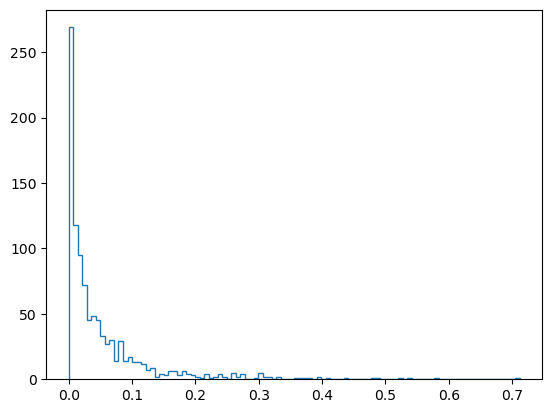

In [28]:
plt.hist(rMp, bins=100, histtype='step', label='RawMET_phi')

In [33]:
len(events)

10000

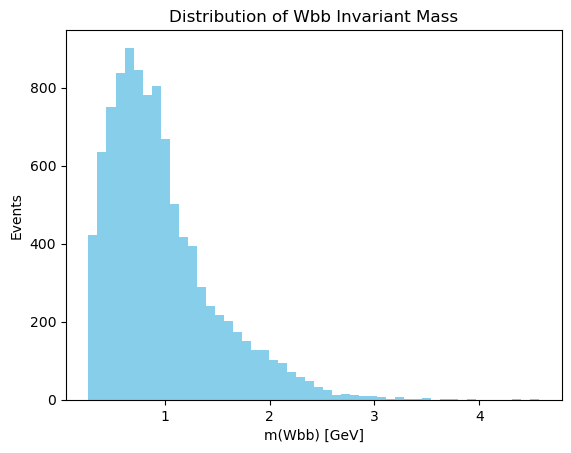

In [43]:
import awkward as ak

# Assuming `events` is your awkward array of records
m_wbb_array = events["lepton_pT"]

# Apply a cut
# mask = m_wbb_array > 0.9
# selected_events = events[mask]

# Or plot
import matplotlib.pyplot as plt
plt.hist(ak.to_numpy(m_wbb_array), bins=50, color='skyblue')
plt.xlabel("m(Wbb) [GeV]")
plt.ylabel("Events")
plt.title("Distribution of Wbb Invariant Mass")
plt.show()


In [35]:
print(m_wbb_array[:10])

[0.989, 0.992, 0.866, 0.872, 0.977, 0.894, 3.53, 0.937, 0.783, 0.929]
